# Rain in Australia prediction

## Agenda:
1. [Introduction](#1)
    - 1.1 [Context](#2)
    - 1.2 [Columns Description](#3)
    - 1.3 [Objective](#4)
2. [Data Preparation](#5)
    - 2.1 [Packages & Helping Functions](#6)
    - 2.2 [Data Loading](#7)
    - 2.3 [Understanding Data](#8)
    - 2.4 [Data Cleaning](#9)
3. [Exploratory Data Analysis](#10)
    - 3.1 [Univariate Analysis](#11)
    - 3.2 [Bivariate Analysis](#12)
4. [Modeling](#13)
    - 4.2 [Splitting and Preprocessing](#14)
    - 4.3 [Naïve Bayes](#15)
    - 4.3 [Random Forest](#16)
    - 4.3 [Logistic Regression](#17)
5. [Conclusion](#18)

<h1><center>1. Introduction</center></h1><a id=1></a>

### 1.1 Context <a id=2></a>
This [dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from many locations across Australia. Observations were drawn from numerous weather stations. This dataset has around 142,000 observations in it with 23 columns and it is a mix between categorical and numeric values.

### 1.2 Columns Description <a id=3></a>
| Column | Description |
| :- | :- |
| Date | The date of observation. |
| Location | The common name of the location of the weather station. |
| MinTemp | The minimum temperature in degrees celsius. |
| MaxTemp | The maximum temperature in degrees celsius. |
| Rainfall | The amount of rainfall recorded for the day in mm. |
| Evaporation | The so-called Class A pan evaporation (mm) in the 24 hours to 9 am. |
| Sunshine | The number of hours of bright sunshine in the day. |
| WindGustDir | The direction of the strongest wind gust in the 24 hours to midnight. |
| WindGustSpeed | The speed (km/h) of the strongest wind gust in the 24 hours to midnight. |
| WindDir9am | Direction of the wind at 9 am. |
| WindDir3pm | Direction of the wind at 3 pm. |
| WindSpeed9am | Wind speed (km/hr) averaged over 10 minutes prior to 9 am. |
| WindSpeed3pm | Wind speed (km/hr) averaged over 10 minutes prior to 3 pm. |
| Humidity9am | Humidity (percent) at 9 am. |
| Humidity3pm | Humidity (percent) at 3 pm. |
| Pressure9am | Atmospheric pressure (hpa) reduced to mean sea level at 9 am. |
| Pressure3pm | Atmospheric pressure (hpa) reduced to mean sea level at 3 pm. |
| Cloud9am | Fraction of sky obscured by cloud at 9 am. This is measured in “oktas”, which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates a completely clear sky whilst an 8 indicates that it is completely overcast. |
| Cloud3pm | Fraction of sky obscured by cloud (in “oktas”: eighths) at 3pm. See Cload9am for a description of the values. |
| Temp9am | Temperature (degrees C) at 9am. |
| Temp3pm | Temperature (degrees C) at 3pm. |
| RainToday | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0. |
| RainTomorrow | The amount of next day rain (mm). Used to create response variable RainTomorrow. A kind of measure of the “risk”. |

### 1.3 Objective <a id=4></a>

The aim of this notebook is to perform a descriptive and exploratory analysis of the data in order to understand how the phenomena of each variable behave individually and transversely and to build a machine learning model to accurately predict whether it rains the next day or not using classification techniques.

<h1><center>2. Data Preparation</center></h1><a id=5></a>

### 2.1 Packages & Helping Functions <a id=6></a>

In [1]:
# For Loading and Manipulating data.
import pandas as pd
import numpy as np

# For visualization purposes.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# For classification models and PCA.
import mlpack

# For scaling.
from sklearn.preprocessing import StandardScaler


# To evaluate different models
from sklearn.metrics import *

### 2.2 Data Loading<a id=7></a>

In [2]:
!wget -q https://datasets.mlpack.org/weatherAUS.csv

In [3]:
df = pd.read_csv("weatherAUS.csv")

### 2.3 Understanding Data <a id=8></a>

#### The first five rows of the dataset

In [4]:
pd.set_option('display.max_columns', None)          #to display all columns
df.head(7)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No


#### The shape of the data

In [5]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (145460, 23)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

-------------------

#### Summary statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


### 2.3 Data Cleaning <a id=9></a>

#### Encoding `Date`

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

Date is a cyclic feature that needs to be feature engineered. We will extract the year, month and day.

In [9]:
df['Year'] = df['Date'].dt.year

Months and days are cyclic so we will transform the data into two dimensions using sine and consine transformation.

In [10]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [11]:
df['month'] = df.Date.dt.month
df = encode(df, 'month', 12)

df['day'] = df.Date.dt.day
df = encode(df, 'day', 31)

----------------------

#### Dropping unnecessary columns

In [12]:
df.drop(['Date','day','month'], axis=1, inplace=True)

---------------------

#### Dealing with null values

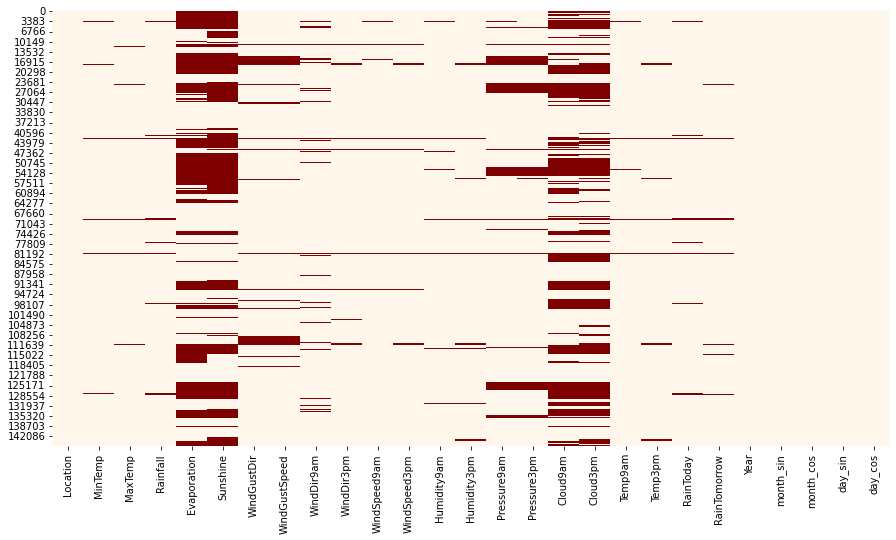

In [13]:
plt.figure(figsize=(15,8));
sns.heatmap(df.isnull(), cbar=False, cmap="OrRd")
plt.show();

In [14]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")

MinTemp ==> Missing Values : 1485, dtypes : float64
MaxTemp ==> Missing Values : 1261, dtypes : float64
Rainfall ==> Missing Values : 3261, dtypes : float64
Evaporation ==> Missing Values : 62790, dtypes : float64
Sunshine ==> Missing Values : 69835, dtypes : float64
WindGustDir ==> Missing Values : 10326, dtypes : object
WindGustSpeed ==> Missing Values : 10263, dtypes : float64
WindDir9am ==> Missing Values : 10566, dtypes : object
WindDir3pm ==> Missing Values : 4228, dtypes : object
WindSpeed9am ==> Missing Values : 1767, dtypes : float64
WindSpeed3pm ==> Missing Values : 3062, dtypes : float64
Humidity9am ==> Missing Values : 2654, dtypes : float64
Humidity3pm ==> Missing Values : 4507, dtypes : float64
Pressure9am ==> Missing Values : 15065, dtypes : float64
Pressure3pm ==> Missing Values : 15028, dtypes : float64
Cloud9am ==> Missing Values : 55888, dtypes : float64
Cloud3pm ==> Missing Values : 59358, dtypes : float64
Temp9am ==> Missing Values : 1767, dtypes : float64
Temp3pm 

Firstly, let's deal with numerical variables.

In [15]:
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
           'Temp9am' ,'Temp3pm']

In [16]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [17]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")

WindGustDir ==> Missing Values : 10326, dtypes : object
WindDir9am ==> Missing Values : 10566, dtypes : object
WindDir3pm ==> Missing Values : 4228, dtypes : object
RainToday ==> Missing Values : 3261, dtypes : object
RainTomorrow ==> Missing Values : 3267, dtypes : object


In [18]:
cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

We will impute rows where `RainTomorrow` is missing becuase it is the target variable.

In [19]:
df.dropna(subset=['RainTomorrow'], inplace = True)

In [20]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (142193, 27)


In [21]:
cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

----------------------

#### Duplicates

In [22]:
df.duplicated().sum()

0

-----------------------

### Summary
From the previous quick overview of the data we can conclude that:
- The dataset has 142193 rows.
- Since date is a cyclic feature, Sine and consine transformation is used to get better model results. 
- `WindGustDir`, `WindDir9am` and `WindDir3pm` are categorical columns.
- There are two binary categorical variables: `RainToday` and `RainTomorrow`.
- Mean is used to fill NaN values for numerical columns.
- There are no duplicated values.

<h1><center>3. Exploratory Data Analysis</center></h1><a id=10></a>

### 3.1 Univariate Analysis <a id=11></a>

Firstly, let's look at the target variable.

In [23]:
base_color = sns.color_palette()[0]

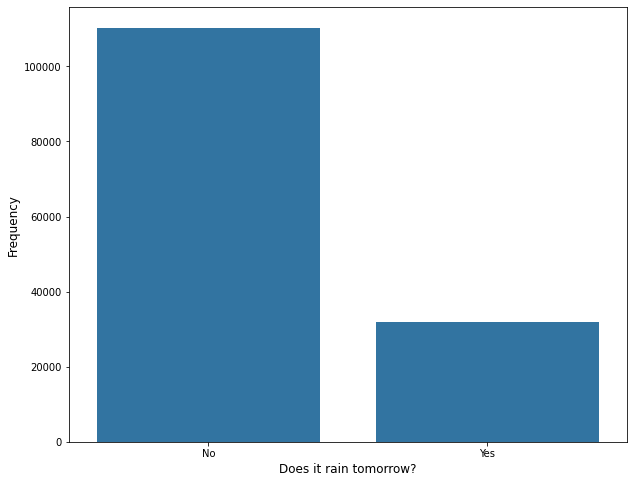

In [24]:
plt.figure(figsize=[10, 8])
sns.countplot(x="RainTomorrow", data=df, color = base_color)
plt.xlabel('Does it rain tomorrow?', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);
plt.show();

In [25]:
print(f"Yes: {len(df[df['RainTomorrow'] == 'Yes']) / len(df) * 100 :.2f}%")
print(f"No: {len(df[df['RainTomorrow'] == 'No']) / len(df) * 100 :.2f}%")

Yes: 22.42%
No: 77.58%


The previous figure shows that the `RainTomorrow` column which is our target value is "No" 77.58% of the time.

---------

Next, let's take a look at the distribution of the numerical variables.

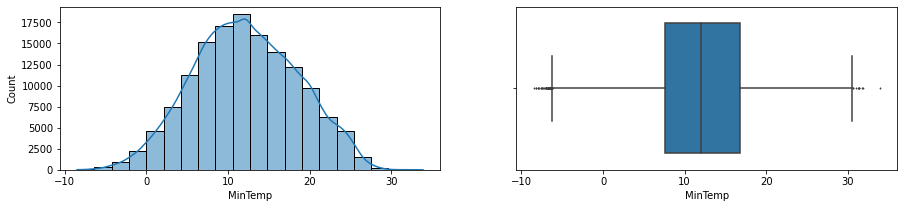

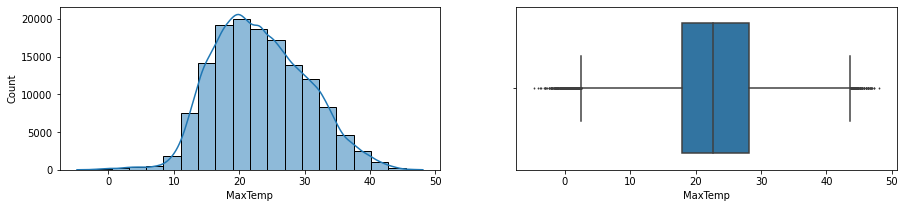

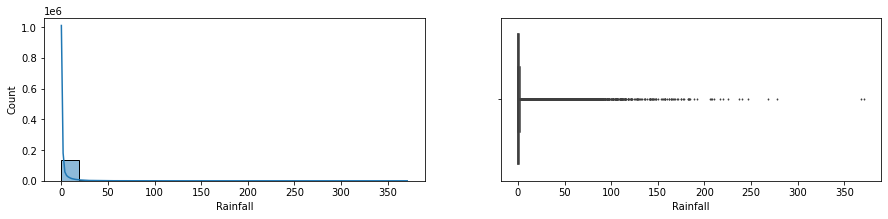

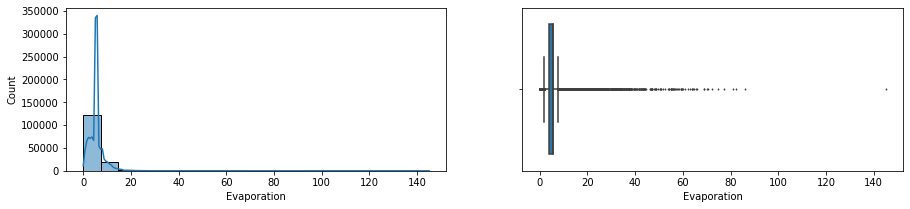

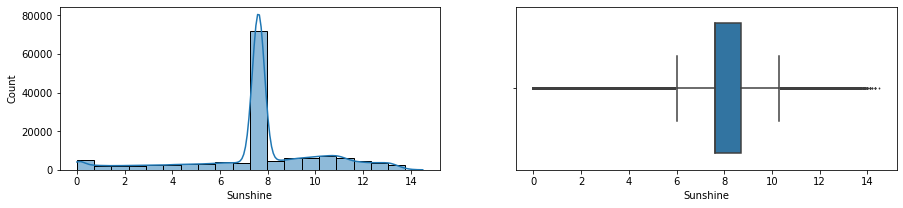

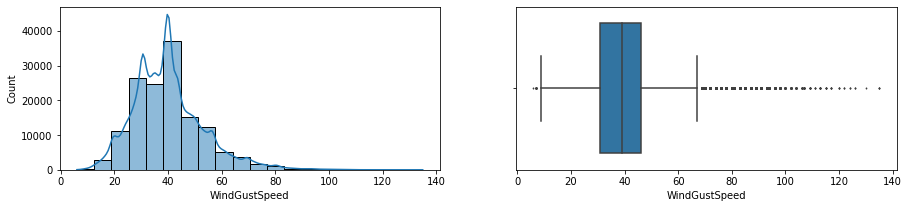

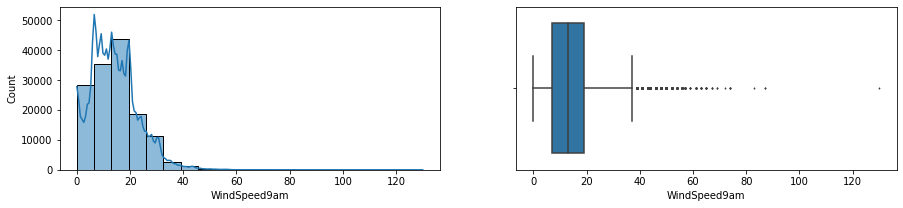

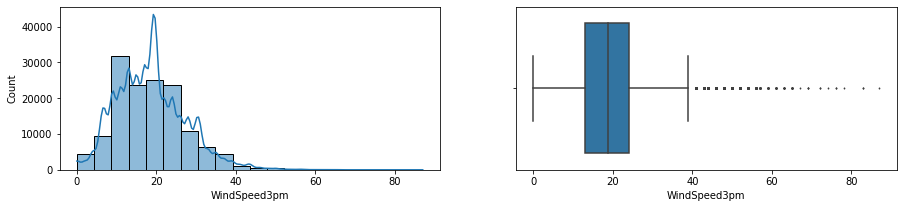

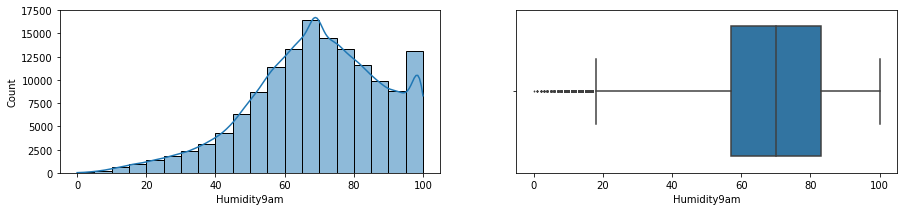

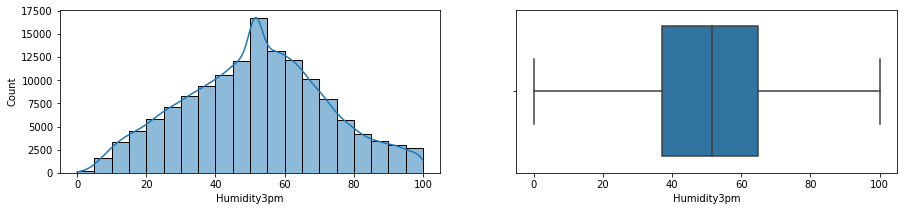

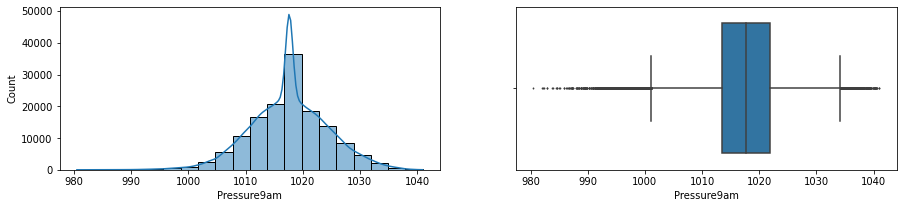

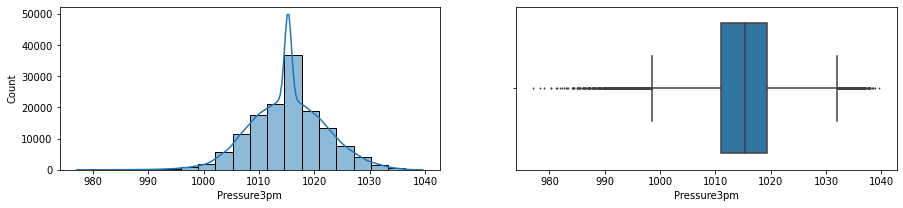

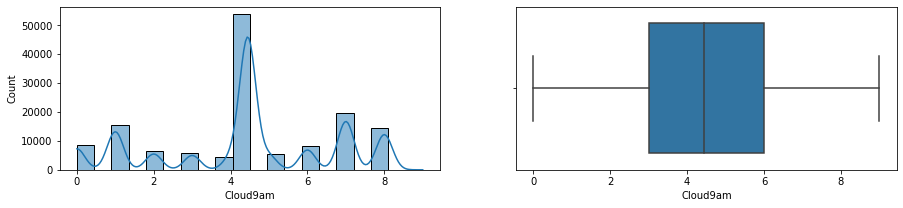

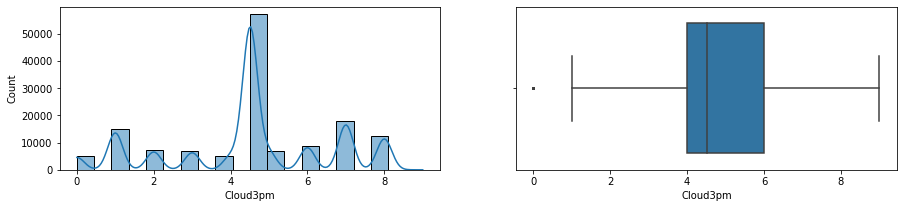

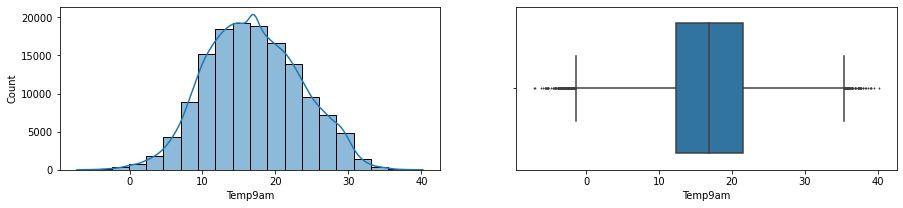

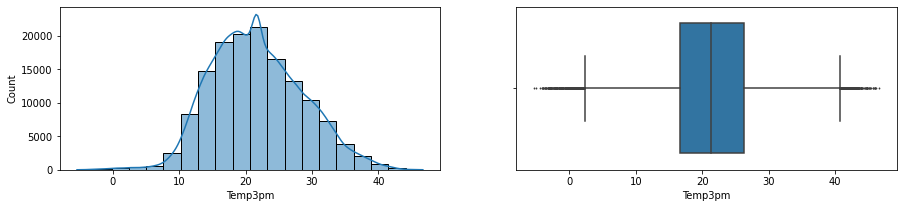

In [26]:
for i in num_cols:
   
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))

    sns.histplot(data = df, x = i, bins = 20, kde = True, ax=axs[0]);
    sns.boxplot(data = df, x = i, ax = axs[1], color = base_color, fliersize=1);

In [27]:
df['Sunshine'].mean()

7.618330823185088

Observations:
- `MinTemp` and `MaxTemp` features roughly have normal distributions with some outliers. 
- `Rainfall` and `Evaporation` features are highly distorted and right skewed.
- `Sunshine` has a unimodal distribution with a mean at nearly 7.6 hrs per day.
- `WindGustSpeed`, `WindSpeed9am` and `WindSpeed3pm` are all right skewed with a lot of outliers.
- `Temp9am` and `Temp3pm` distributions are mostly normal.

----------------

Now, let's take a look at categorical variables.

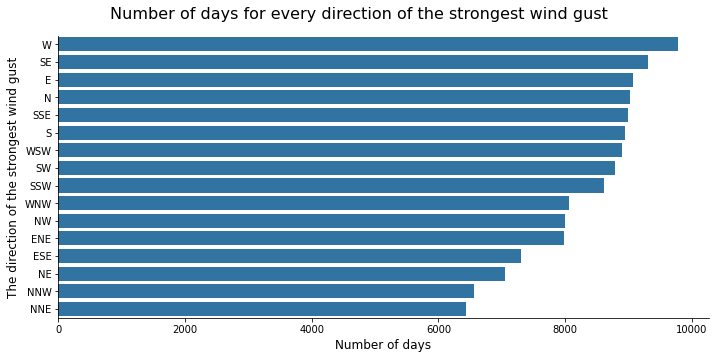

In [28]:
wgd_order = df['WindGustDir'].value_counts().index
sns.catplot(y = "WindGustDir", data=df, color=base_color, 
               order = wgd_order, kind = 'count', aspect = 2);

plt.subplots_adjust(top=0.9)
plt.suptitle('Number of days for every direction of the strongest wind gust', fontsize = 16)
plt.ylabel('The direction of the strongest wind gust', fontsize = 12)
plt.xlabel('Number of days', fontsize = 12);
plt.show();

The graph shows that it there is no one value that appears way more than the other values when it comes to strongest wind gust direction.

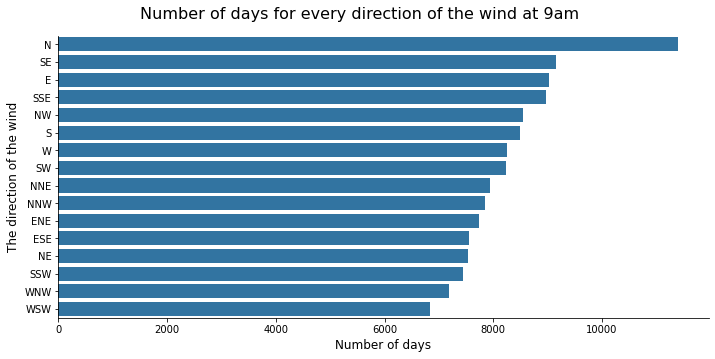

In [29]:
wgd_order = df['WindDir9am'].value_counts().index
sns.catplot(y = "WindDir9am", data=df, color=base_color, 
               order = wgd_order, kind = 'count', aspect = 2);

plt.subplots_adjust(top=0.9)
plt.suptitle('Number of days for every direction of the wind at 9am', fontsize = 16)
plt.ylabel('The direction of the wind', fontsize = 12)
plt.xlabel('Number of days', fontsize = 12);
plt.show();

In [30]:
print(len(df[df['WindDir9am'] == 'N']))
print(len(df[df['WindDir9am'] == 'SE']))

11393
9162


The graph shows that `North` is the most frequent wind direction as it appears nearly 2200 times more than `South East` which comes second.

### Observations
From the previous visualizations, we can conclude that:
- `RainTomorrow` column which is our target value is "No" 77.58% of the time.
- `MinTemp`, `MaxTemp`, `Temp9am` and `Temp3pm` features roughly have normal distributions with some outliers. 
- `Rainfall`, `Evaporation`, `WindGustSpeed`, `WindSpeed9am` and `WindSpeed3pm` are all right skewed with a lot of outliers.
- `Sunshine` has a unimodal distribution with a mean at nearly 7.6 hrs per day.
- If it rained in a day, there is a 53% chance it would rain in the next day.

--------------------------

### 3.2 Bivariate Analysis <a id=12></a>

To start off with, I want to look at the **pairwise correlations** present between features in the data.

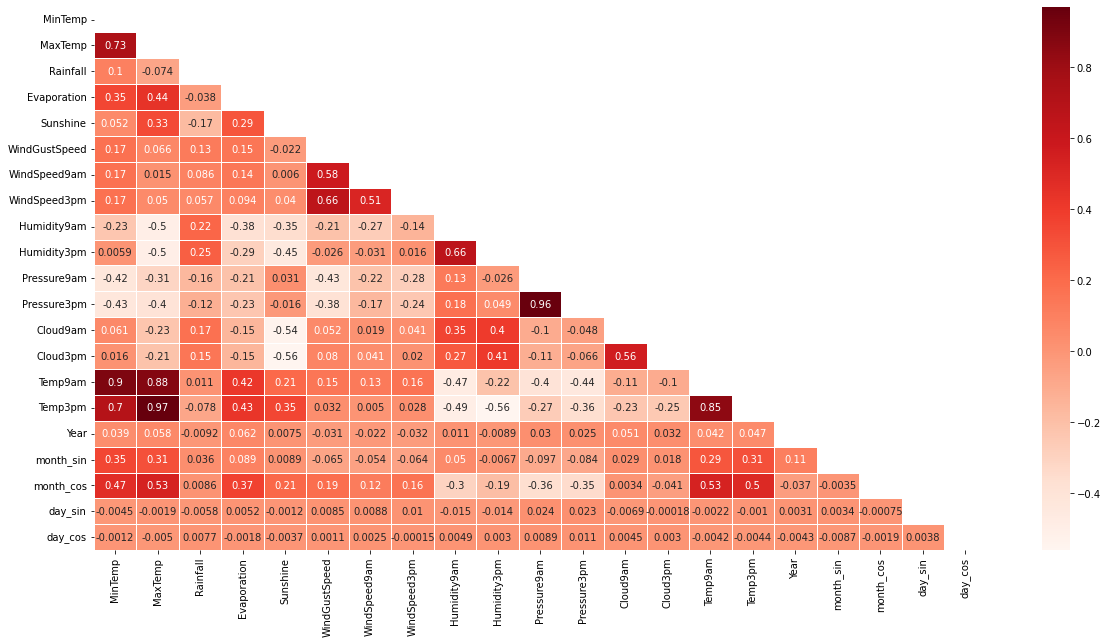

In [31]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5);

- There is a strong positive linear corelation between `MinTemp`, `MaxTemp`, `Temp9am` and `Temp3pm`.
- There is a slight negative corelation between humedity and tempartures.

-------

How do the **categorical features** affect the target variable?

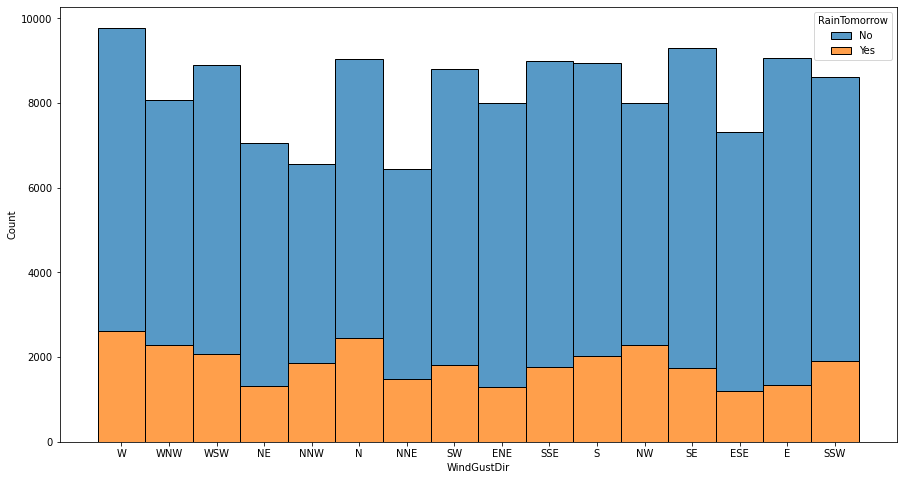

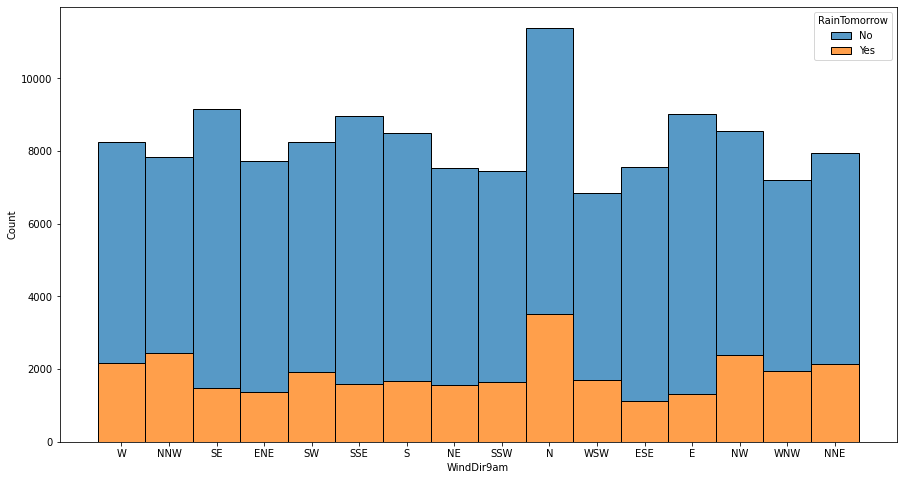

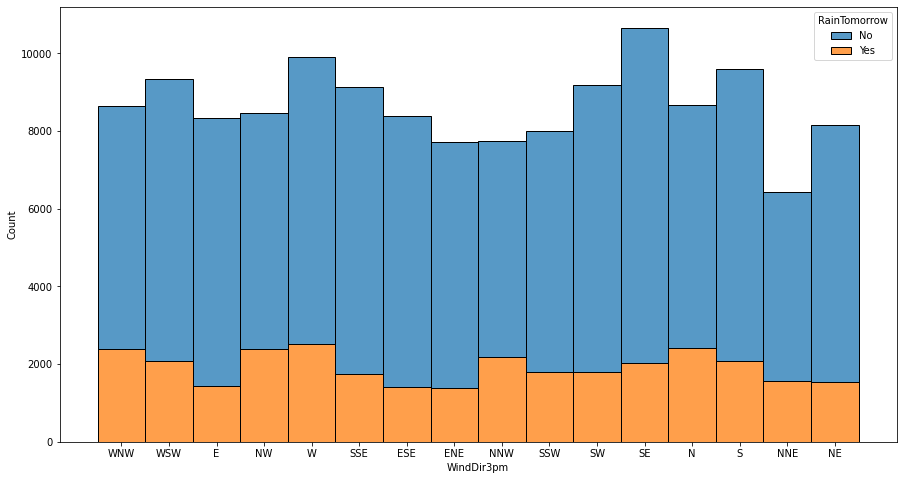

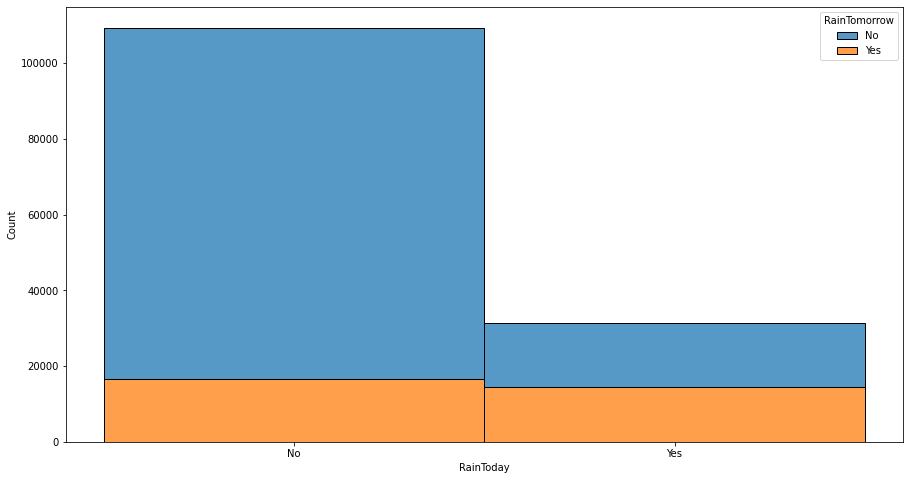

In [32]:
for i in cat_cols:
    plt.figure(figsize=(15,8));
    sns.histplot(binwidth=0.5, x=i, hue="RainTomorrow", data=df, stat="count", multiple="stack")

In [33]:
for i in cat_cols:
    print(df.groupby(i)['RainTomorrow'].value_counts(normalize=True) * 100)

WindGustDir  RainTomorrow
E            No              85.117407
             Yes             14.882593
ENE          No              83.883884
             Yes             16.116116
ESE          No              83.572895
             Yes             16.427105
N            No              72.855087
             Yes             27.144913
NE           No              81.317280
             Yes             18.682720
NNE          No              76.978082
             Yes             23.021918
NNW          No              71.604938
             Yes             28.395062
NW           No              71.460702
             Yes             28.539298
S            No              77.461169
             Yes             22.538831
SE           No              81.383607
             Yes             18.616393
SSE          No              80.484822
             Yes             19.515178
SSW          No              77.967480
             Yes             22.032520
SW           No              79.493009

We can conclude that:
- Most of the values for the categorical features has a chance of `RainTomorrow` between 70% and 85%.
- If it rained in a day, there is a 53% chance it would rain in the next day.

-----------

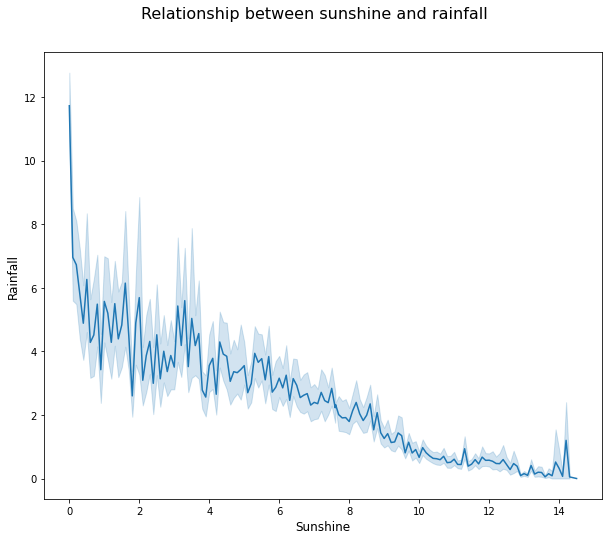

In [34]:
plt.figure(figsize=[10, 8])

sns.lineplot(data=df, x="Sunshine", y="Rainfall",)
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationship between sunshine and rainfall', fontsize = 16)
plt.ylabel('Rainfall', fontsize = 12)
plt.xlabel('Sunshine', fontsize = 12);
plt.show();

When sushine increases rainfall decreases. 

---------

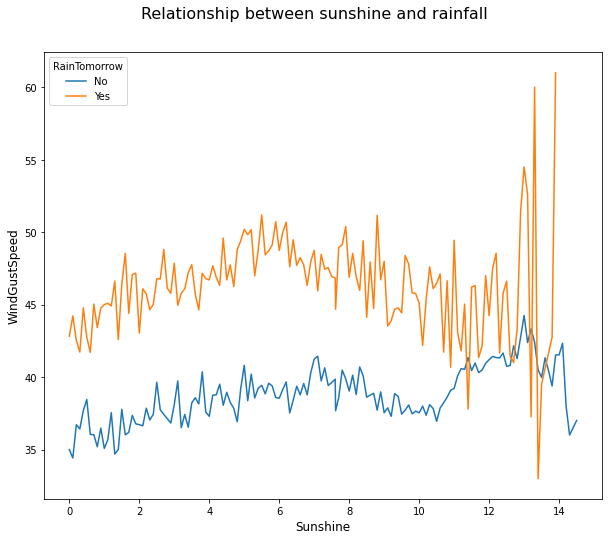

In [35]:
plt.figure(figsize=[10, 8])

sns.lineplot(data=df, x="Sunshine", y="WindGustSpeed", hue = 'RainTomorrow', ci = None)
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationship between sunshine and rainfall', fontsize = 16)
plt.ylabel('WindGustSpeed', fontsize = 12)
plt.xlabel('Sunshine', fontsize = 12);
plt.show();

- Generally, higher wind speed in a day leads to a higher chance of rainfall in the next day.
- When the number of hours of bright sunshine in the day exceeds 12, wind speed takes a wider range of values and it becomes harder to predict whether it would rain the next day.

### Observations
From the previous analysis, we can conclude that:
- There is a slight negative corelation between humedity and tempartures.
- If it rained in a day, there is a 53% chance it would rain in the next day.
- Generally, higher wind speed in a day leads to a higher chance of rainfall in the next day.
- When the number of hours of bright sunshine in the day exceeds 12, wind speed takes a wider range of values and it becomes harder to predict whether it would rain the next day.

<h1><center>4. Modeling</center></h1><a id=13></a>

### 4.2 Splitting and Preprocessing <a id=14></a>

**Preprocessing**

Filling the NaN values in the categorical columns with the mode.

In [36]:
for i in cat_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [37]:
df.isnull().sum().sum()

0

In [38]:
features = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
           'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 
           'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
           'Year', 'month_sin', 'month_cos', 'day_sin', 'day_cos']

----------

**Label-Encoding Binary Categorical Variables**

In [39]:
cols_to_encode = ['RainToday', 'RainTomorrow']

In [40]:
def LabelEncoder(data):

    for col in data.columns:
        if col in cols_to_encode:
            uniqs = list(data[col].unique())
            data[col] = data[col].apply(lambda x: uniqs.index(x))
    return data

In [41]:
df = LabelEncoder(df)

----------

**Splitting the data**

In [42]:
X = df[features]
y = pd.Series(np.array(df['RainTomorrow']))

In [43]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,month_sin,month_cos,day_sin,day_cos
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,2008,-2.449294e-16,1.0,0.201299,0.979530
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,2008,-2.449294e-16,1.0,0.394356,0.918958
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,2008,-2.449294e-16,1.0,0.571268,0.820763
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,2008,-2.449294e-16,1.0,0.724793,0.688967
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,2008,-2.449294e-16,1.0,0.848644,0.528964


------------

**One-Hot-Encoding Categorical Variables**

In [44]:
dummy_Loc = pd.get_dummies(X['Location'], prefix='dummyLoc')
dummy_WGD = pd.get_dummies(X['WindGustDir'], prefix='dummyWGD')
dummy_WD9 = pd.get_dummies(X['WindDir9am'], prefix='dummyWD9am')
dummy_WD3 = pd.get_dummies(X['WindDir3pm'], prefix='dummyWD3pm')

X = pd.concat([X, dummy_Loc, dummy_WGD, dummy_WD9, dummy_WD3],axis=1)
X.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1, inplace=True)

----------

**Scalling and PCA**

In [45]:
X.shape

(142193, 119)

In [46]:
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
output = mlpack.pca(input=X, new_dimensionality=10, decomposition_method='randomized')
X = output['output']

In [47]:
X.shape

(142193, 10)

---------------


**Splitting the data into training and test sets**

In [48]:
output = mlpack.preprocess_split(input=X, input_labels=y, test_ratio=0.2)
Xtrain = output['training']
ytrain = output['training_labels'][:, 0]
Xtest = output['test']
ytest = output['test_labels'][:, 0]

In [49]:
print(f"The shape of Xtrain is      {Xtrain.shape}")
print(f"The shape of Xtest is       {Xtest.shape}")
print(f"The shape of ytrain is      {ytrain.shape}")
print(f"The shape of ytest is       {ytest.shape}")

The shape of Xtrain is      (113755, 10)
The shape of Xtest is       (28438, 10)
The shape of ytrain is      (113755,)
The shape of ytest is       (28438,)


---------

#### Evaluation metrics

* True Positive - The actual value was true & the model predicted true.
* False Positive - The actual value was false & the model predicted true, Type I error.
* True Negative - The actual value was false & the model predicted false.
* False Negative - The actual value was true & the model predicted false, Type II error.

`Accuracy`: is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

$$Accuracy = \frac{True_{positive} + True_{negative}}{True_{positive} + True_{negative} + False_{positive} + False_{negative}}$$

`Precision`: is calculated as the ratio between the number of positive samples correctly classified to the total number of samples classified as Positive. The precision measures the model's accuracy in classifying a sample as positive.

$$Precision = \frac{True_{positive}}{True_{positive} + False_{positive}}$$

`Recall`: is calulated as the ratio between the number of positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

$$Recall = \frac{True_{positive}}{True_{positive} + False_{negative}}$$

`Confusion matrix`: A technique used for summarizing the performance of a classification algorithm. 

![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)


* The decision of whether to use precision or recall depends on the type of problem begin solved.
* If the goal is to detect all positive samples then use recall.
* Use precision if the problem is sensitive to classifying a sample as Positive in general.

In [50]:
def modelEval(ytest, yPreds):
    print("\n---- Evaluation Metrics ----")
    print(f"Accuracy: {accuracy_score(ytest, yPreds):.2f}")
    print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds):.2f}")
    print(f"Recall Score: {recall_score(ytest,yPreds, average = 'micro'):.2f}")
    print(f"Precision Score: {precision_score(ytest,yPreds, average = 'micro'):.2f}")

----------

### 4.3 Naïve Bayes<a id=15></a>

Training the model

In [51]:
output = mlpack.nbc(training=Xtrain, labels=ytrain)

In [52]:
nbc_model = output["output_model"]

Predicting values

In [53]:
predictions = mlpack.nbc(input_model=nbc_model, test=Xtest)
yPredsNB = predictions["predictions"].reshape(-1, 1).squeeze()

Evaluating the model

In [54]:
modelEval(ytest, yPredsNB)


---- Evaluation Metrics ----
Accuracy: 0.82
Cohen's Kappa: 0.38
Recall Score: 0.82
Precision Score: 0.82


------------

### 4.4 Random Forest<a id=16></a>

Training the model

In [55]:
output = mlpack.random_forest(training=Xtrain, labels=ytrain)

In [56]:
rf_model = output["output_model"]

Predicting values

In [57]:
predictions = mlpack.random_forest(input_model= rf_model, test=Xtest)
yPredsRF = predictions["predictions"].reshape(-1, 1).squeeze()

Evaluating the model


In [58]:
modelEval(ytest, yPredsRF)


---- Evaluation Metrics ----
Accuracy: 0.82
Cohen's Kappa: 0.39
Recall Score: 0.82
Precision Score: 0.82


--------------

### 4.5 Logistic Regression<a id=17></a>

Training the model

In [59]:
output = mlpack.logistic_regression(training=Xtrain, labels=ytrain, lambda_=0.1)

In [60]:
lr_model = output['output_model']

Predicting values

In [61]:
output = mlpack.logistic_regression(input_model=lr_model, test=Xtest)
yPredsLR = output['output'].reshape(-1, 1).squeeze()

Evaluating the model

In [62]:
modelEval(ytest, yPredsLR)


---- Evaluation Metrics ----
Accuracy: 0.83
Cohen's Kappa: 0.41
Recall Score: 0.83
Precision Score: 0.83


<h1><center>5. Conclusion</center></h1><a id=18></a>

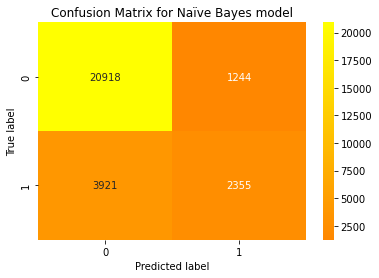

In [63]:
cm = confusion_matrix(ytest,yPredsNB)
sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
plt.title("Confusion Matrix for Naïve Bayes model")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

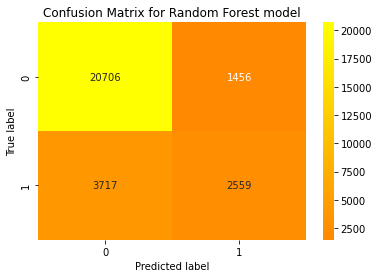

In [64]:
cm = confusion_matrix(ytest,yPredsRF)
sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
plt.title("Confusion Matrix for Random Forest model")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

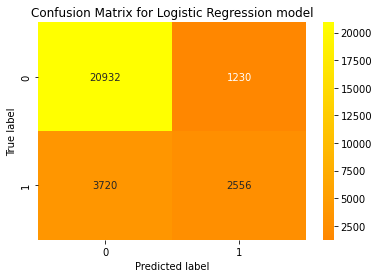

In [65]:
cm = confusion_matrix(ytest,yPredsLR)
sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
plt.title("Confusion Matrix for Logistic Regression model")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

### Summary:
- The 3 models accuracy scores ranges between 0.82 and 0.83. So, the models do a very good job in predicting whether or not it will rain tomorrow in Australia.
- The 3 models shows no signs of overfitting.
- Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.